### Import Library

In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,AveragePooling2D
from keras import Sequential
from keras.datasets import mnist
import os
import pandas as pd
import numpy as np

### Split MNIST dataset into training and testing dataset

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

### Training and Testing shape

In [ ]:
print(f"Training size: {X_train.shape}")     ## store images for train
print(f"Test size: {X_test.shape}")      ## store images for test
print(f"Training Label size: {y_train.shape}")   ## store train label
print(f"Test Label size: {y_test.shape}")         ## store test label
print(f"Image Size :  {X_train[0].shape}")   #image size

Training size: (60000, 28, 28)
Test size: (10000, 28, 28)
Training Label size: (60000,)
Test Label size: (10000,)
Image Size :  (28, 28)


### Iterate on output dataset

In [ ]:
for i in range(0,5):
  print(y_train[i])

5
0
4
1
9


### Visualizing images

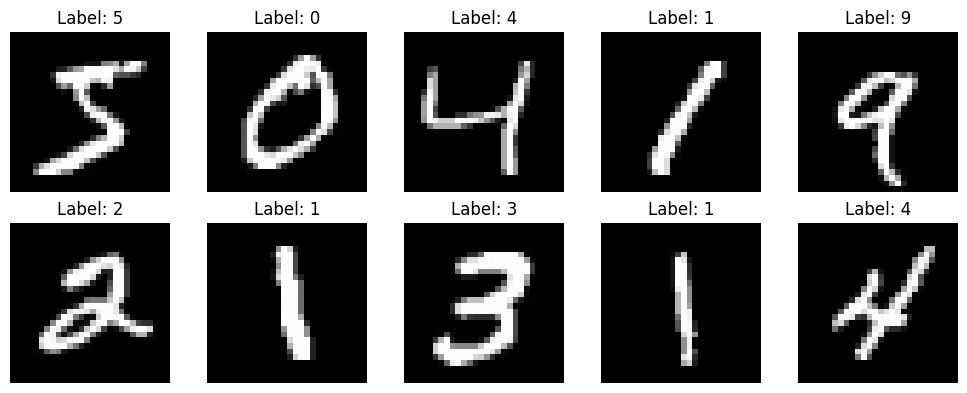

In [ ]:
import matplotlib.pyplot as plt

# Show first 10 images in 2x5 grid
plt.figure(figsize=(10, 4))  # Width=10, Height=4

for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### View an image in more details

Thresh  102.0


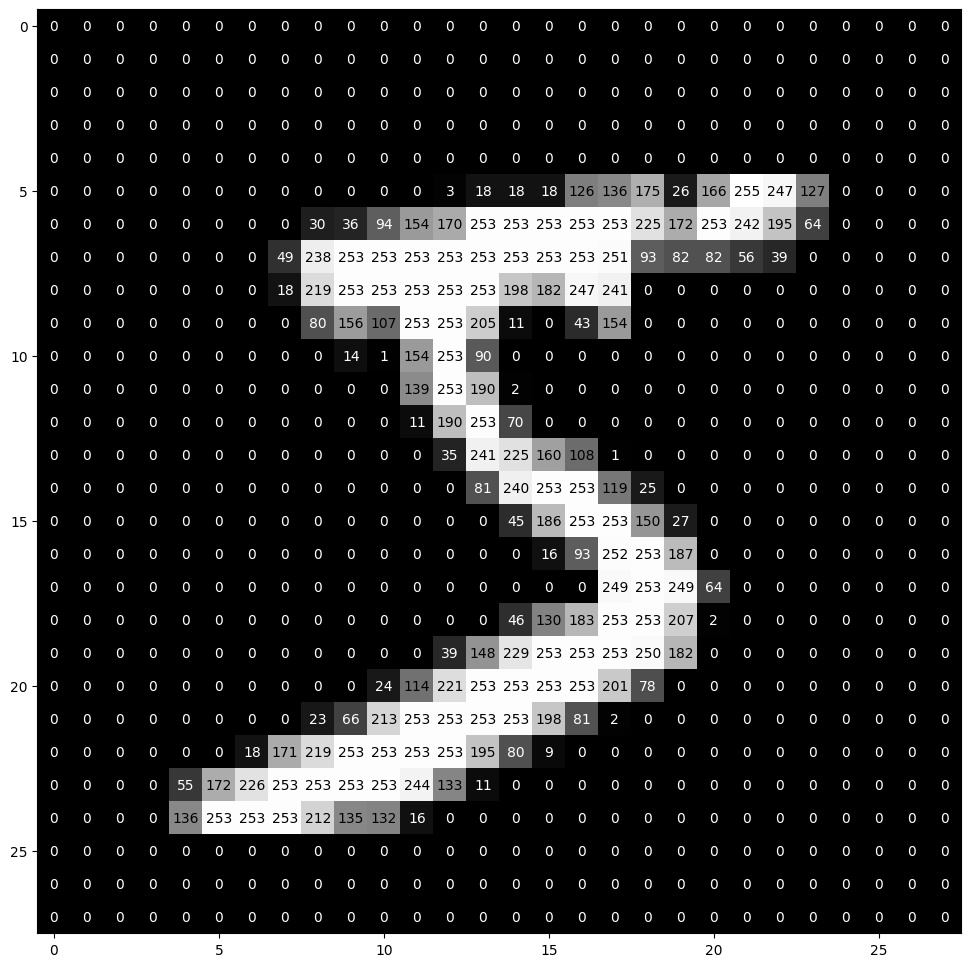

In [ ]:
def visualize_image(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max() / 2.5

  for i in range(width):
    for j in range(height):
      ax.annotate(str(round(img[i][j],2)),xy= (j,i),horizontalalignment='center',
                  verticalalignment= 'center', color = 'white' if img[i][j]<thresh else 'black')
  print("Thresh ", thresh)



fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_image(X_train[0], ax)

### Preprocess input images: Rescale the Images by Dividing Every Pixel in Every Image by 255

In [ ]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Thresh  0.4


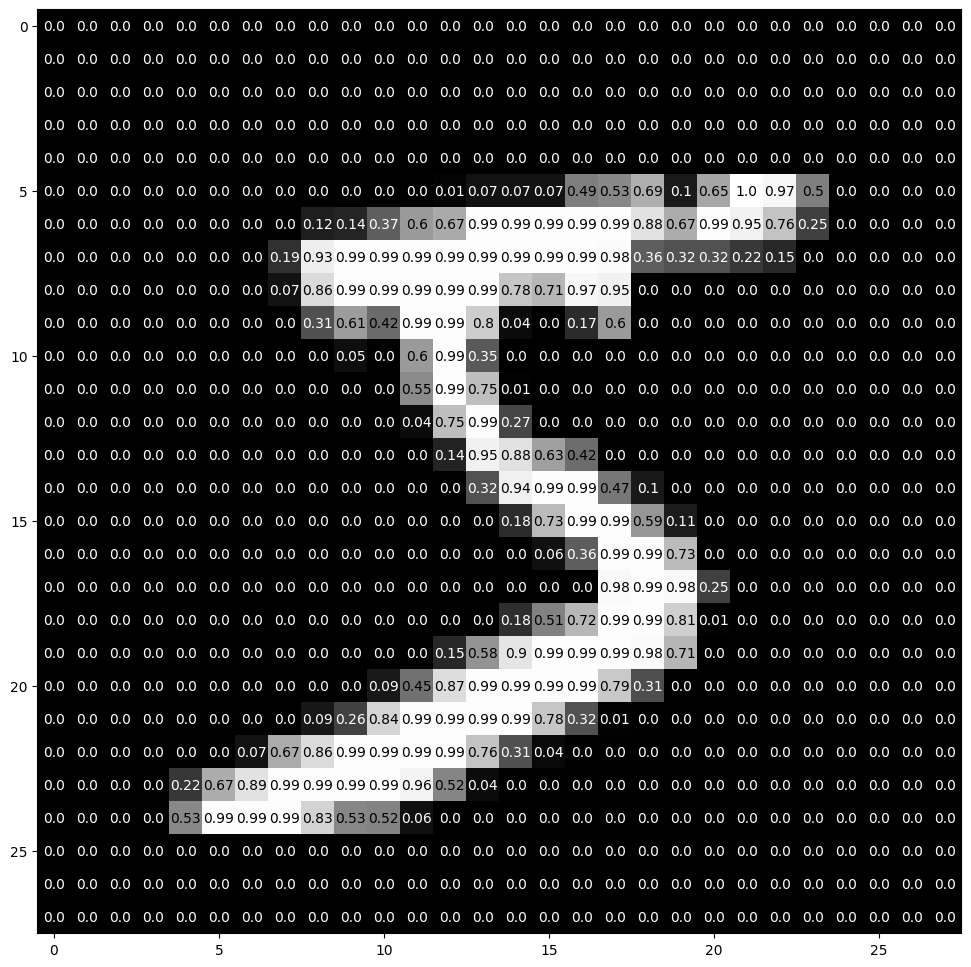

In [ ]:
def visualize_image(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max() / 2.5

  for i in range(width):
    for j in range(height):
      ax.annotate(str(round(img[i][j],2)),xy= (j,i),horizontalalignment='center',
                  verticalalignment= 'center', color = 'white' if img[i][j]<thresh else 'black')
  print("Thresh ", thresh)



fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_image(X_train[0], ax)

### Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
# print first ten (integer-valued) training labels
print('Integer value of labels:', y_train[:10], sep='\n')

Integer value of labels:
[5 0 4 1 9 2 1 3 1 4]


In [ ]:
# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# print first ten (one-hot) training labels
print("One-hot label:", y_train[:2], sep='\n')

One-hot label:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# print first ten (one-hot) training labels
print("One-hot label:", y_train[:5], sep='\n')

One-hot label:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train.shape[0]

60000

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train[0].shape

(10,)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Adding Channel

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
X_train[0].shape

(28, 28, 1)

In [ ]:
X_test[0].shape

(28, 28, 1)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Resize train data

In [ ]:
# Resize function
def resize_images(X, new_size=(32, 32)):
    # Resize images
    X_resized = tf.image.resize(X, new_size)
    return X_resized.numpy()  # Convert back to NumPy array
# Resize X_train
X_train = resize_images(X_train)

In [ ]:
X_train[0].shape

(32, 32, 1)

### Resize Test Data

In [ ]:
# Resize function
def resize_images(X, new_size=(32, 32)):
    # Resize images
    X_resized = tf.image.resize(X, new_size)
    return X_resized.numpy()  # Convert back to NumPy array
# Resize X_train
X_test = resize_images(X_test)

In [ ]:
X_test[0].shape

(32, 32, 1)

## ARCHITECTURE OF LeNet-5

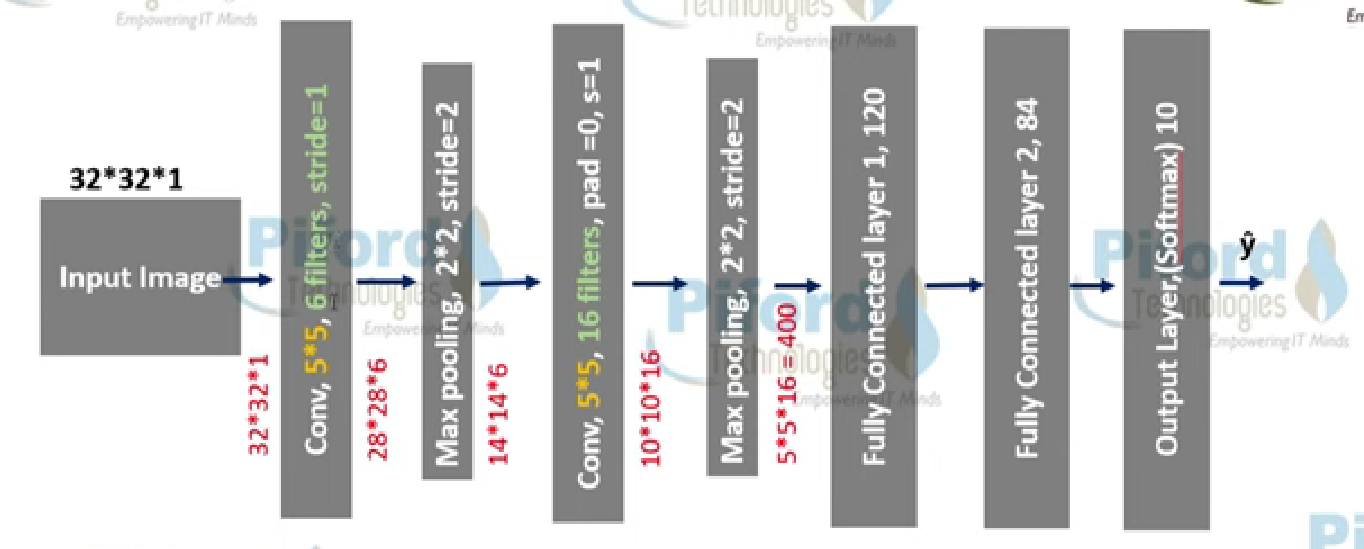

### Architecture of LeNet-5

In [ ]:
model=Sequential()

# CONV_1:
model.add(Conv2D(6,(5,5) , padding='valid' , input_shape=(32,32,1) , activation='tanh'))
# POOL_1: downsample the image to choose the best features
model.add(AveragePooling2D(pool_size=(2,2), strides = 2, padding='valid'))

# CONV_2:
model.add(Conv2D(16,(5,5),padding='valid' , activation='tanh'))
# POOL_2: more downsampling
model.add(AveragePooling2D(pool_size=(2,2), strides = 2, padding='valid'))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))

# output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=keras.metrics.categorical_crossentropy,optimizer = keras.optimizers.Adam(),metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
history = model.fit(
    x=X_train,                       # Training data (features)
    y=y_train,                       # Training labels (target)
    batch_size=128,                   # Number of samples per gradient update
    epochs=10,                       # Number of training epochs
    # validation_data=(X_test, y_test), # Data for validation
    validation_split=0.1,
    # shuffle=True,                    # Shuffle training data each epoch
    verbose=1,                       # Verbosity mode (0=silent, 1=progress bar)
    callbacks=[                      # List of callbacks
        tensorflow.keras.callbacks.EarlyStopping(patience=3),  # Stop if no improvement
        tensorflow.keras.callbacks.ModelCheckpoint(           # Save best model
            'best_LeNet_model.h5',
            save_best_only=True
        )
    ]
)

Epoch 1/10
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - Precision: 0.9197 - Recall: 0.7218 - accuracy: 0.8252 - loss: 0.6010

422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - Precision: 0.9198 - Recall: 0.7225 - accuracy: 0.8256 - loss: 0.5998 - val_Precision: 0.9732 - val_Recall: 0.9567 - val_accuracy: 0.9642 - val_loss: 0.1242
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - Precision: 0.9672 - Recall: 0.9498 - accuracy: 0.9574 - loss: 0.1413

422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - Precision: 0.9672 - Recall: 0.9498 - accuracy: 0.9574 - loss: 0.1413 - val_Precision: 0.9825 - val_Recall: 0.9712 - val_accuracy: 0.9777 - val_loss: 0.0812
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - Precision: 0.9781 - Recall: 0.9690 - accuracy: 0.9730 - loss: 0.0870

422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - Precision: 0.9781 - Recall: 0.9690 - accuracy: 0.9730 - loss: 0.0870 - val_Precision: 0.9822 - val_Recall: 0.9763 - val_accuracy: 0.9798 - val_loss: 0.0705
Epoch 4/10
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - Precision: 0.9829 - Recall: 0.9768 - accuracy: 0.9794 - loss: 0.0652

422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - Precision: 0.9829 - Recall: 0.9768 - accuracy: 0.9794 - loss: 0.0652 - val_Precision: 0.9838 - val_Recall: 0.9793 - val_accuracy: 0.9817 - val_loss: 0.0634
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - Precision: 0.9873 - Recall: 0.9835 - accuracy: 0.9852 - loss: 0.0486

422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - Precision: 0.9873 - Recall: 0.9835 - accuracy: 0.9852 - loss: 0.0486 - val_Precision: 0.9851 - val_Recall: 0.9808 - val_accuracy: 0.9822 - val_loss: 0.0584
Epoch 6/10
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - Precision: 0.9896 - Recall: 0.9866 - accuracy: 0.9879 - loss: 0.0413

422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - Precision: 0.9896 - Recall: 0.9866 - accuracy: 0.9879 - loss: 0.0413 - val_Precision: 0.9858 - val_Recall: 0.9827 - val_accuracy: 0.9847 - val_loss: 0.0538
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - Precision: 0.9917 - Recall: 0.9887 - accuracy: 0.9902 - loss: 0.0314

422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - Precision: 0.9917 - Recall: 0.9887 - accuracy: 0.9902 - loss: 0.0314 - val_Precision: 0.9885 - val_Recall: 0.9845 - val_accuracy: 0.9860 - val_loss: 0.0494
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - Precision: 0.9929 - Recall: 0.9911 - accuracy: 0.9920 - loss: 0.0255 - val_Precision: 0.9873 - val_Recall: 0.9850 - val_accuracy: 0.9862 - val_loss: 0.0544
Epoch 9/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - Precision: 0.9951 - Recall: 0.9935 - accuracy: 0.9945 - loss: 0.0211 - val_Precision: 0.9858 - val_Recall: 0.9835 - val_accuracy: 0.9848 - val_loss: 0.0569
Epoch 10/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - Precision: 0.9950 - Recall: 0.9939 - accuracy: 0.9946 - loss: 0.0181 - val_Precision: 0.9865 - val_Recall: 0.9842 - val_accuracy: 0.9848 - val_loss: 0.0560


In [ ]:
score=model.evaluate(X_test,y_test )
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - Precision: 0.9826 - Recall: 0.9804 - accuracy: 0.9815 - loss: 0.0693
Test loss: 0.061143890023231506
Test accuracy: 0.9829000234603882


In [ ]:
results = model.evaluate(X_test, y_test)
print("Loss:", results[0])
print("Accuracy:", results[1])
print("Precision:", results[2])
print("Recall:", results[3])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - Precision: 0.9826 - Recall: 0.9804 - accuracy: 0.9815 - loss: 0.0693
Loss: 0.061143890023231506
Accuracy: 0.9829000234603882
Precision: 0.9840633273124695
Recall: 0.9818000197410583


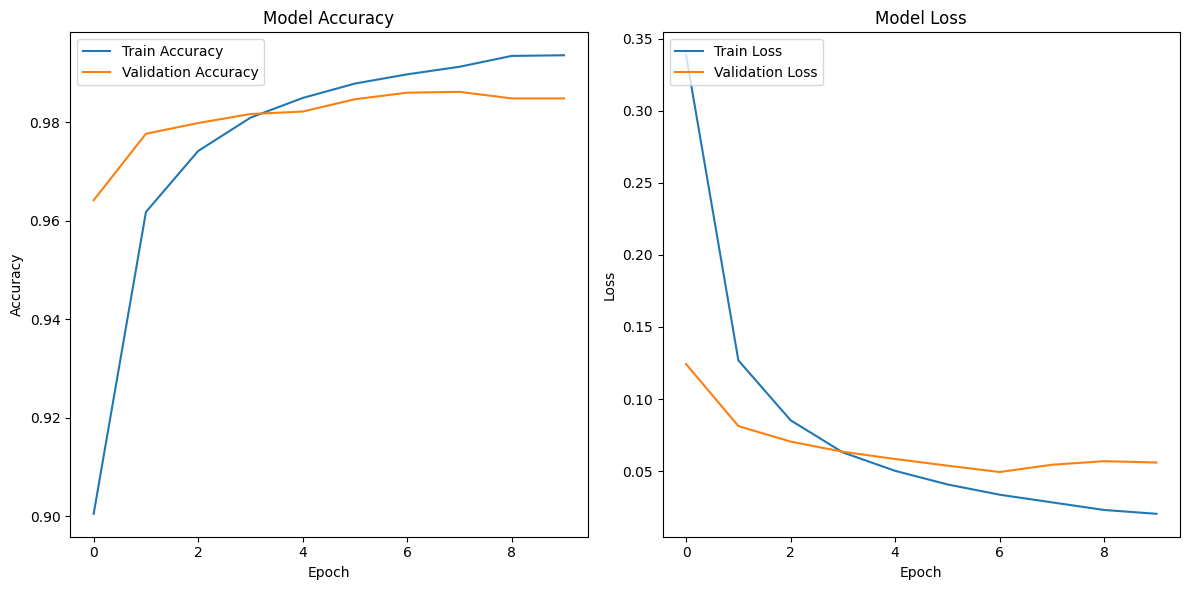

In [ ]:
   import matplotlib.pyplot as plt

   # Assuming 'history' is the output from model.fit()
   # Plot training & validation accuracy values
   plt.figure(figsize=(12, 6))

   # Accuracy plot
   plt.subplot(1, 2, 1)
   plt.plot(history.history['accuracy'], label='Train Accuracy')
   plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
   plt.title('Model Accuracy')
   plt.ylabel('Accuracy')
   plt.xlabel('Epoch')
   plt.legend(loc='upper left')

   # Loss plot
   plt.subplot(1, 2, 2)
   plt.plot(history.history['loss'], label='Train Loss')
   plt.plot(history.history['val_loss'], label='Validation Loss')
   plt.title('Model Loss')
   plt.ylabel('Loss')
   plt.xlabel('Epoch')
   plt.legend(loc='upper left')

   plt.tight_layout()
   plt.show()


### PREDICTION ON TEST IMAGES

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicted Label: 9


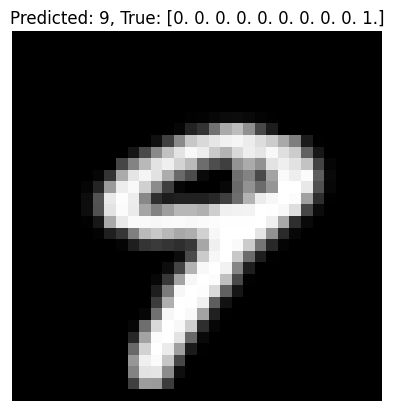

In [ ]:
predictions = model.predict(X_test)

print("Predicted Label:", np.argmax(predictions[9]))
plt.imshow(X_test[9].reshape(32,32), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[9])}, True: {y_test[9]}")
plt.axis('off')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


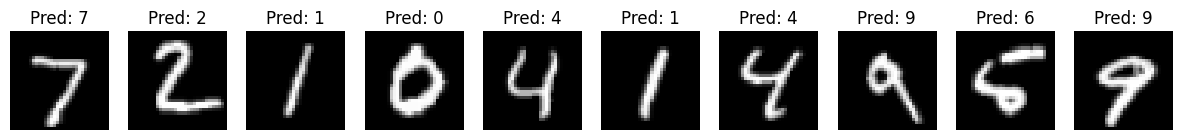

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# ================ 1. Load the Trained Model ================
model = tf.keras.models.load_model('/content/best_LeNet_model.h5')  # Adjust the path as necessary

# ================ 2. Compile the Model ================
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  # Compile with appropriate loss and metrics


# ================ 3. Make Predictions ================
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability

# ================ 4. Visualize Predictions (Optional) ================
n = 10  # Number of images to display
plt.figure(figsize=(15, 5))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title(f'Pred: {predicted_classes[i]}')
    plt.axis('off')
plt.show()
